In [27]:
library(stats)
library(cluster)
library(ggplot2)
suppressPackageStartupMessages({library(factoextra)})  

In [28]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [37]:
X <- scale(iris[, 0:4])  
head(X)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052
-0.5353840,1.93331463,-1.165809,-1.048667


In [30]:
d  <- dist(X, method = "euclidean")
hc <- hclust(d, method = "ward.D2")

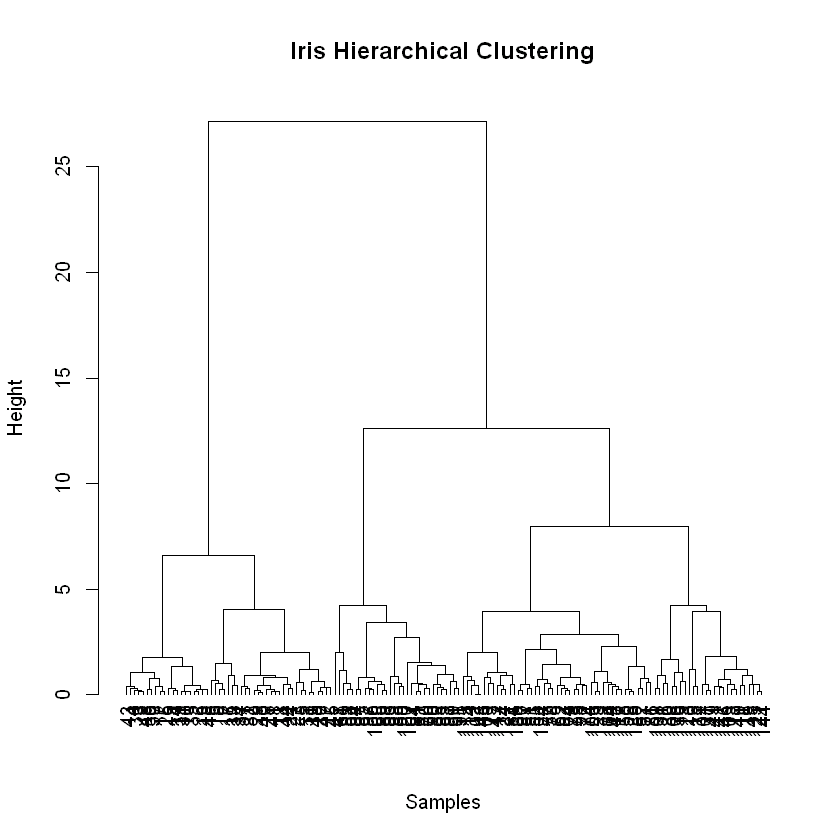

In [31]:
plot(as.dendrogram(hc), main = "Iris Hierarchical Clustering",
     ylab = "Height", xlab = "Samples")

In [32]:
sil_k <- sapply(2:6, function(kk) {
  ss <- silhouette(cutree(hc, k = kk), d)
  mean(ss[, "sil_width"])
})
print(round(setNames(sil_k, 2:6), 3))

    2     3     4     5     6 
0.577 0.447 0.401 0.331 0.315 


cl
 1  2  3 
49 30 71 

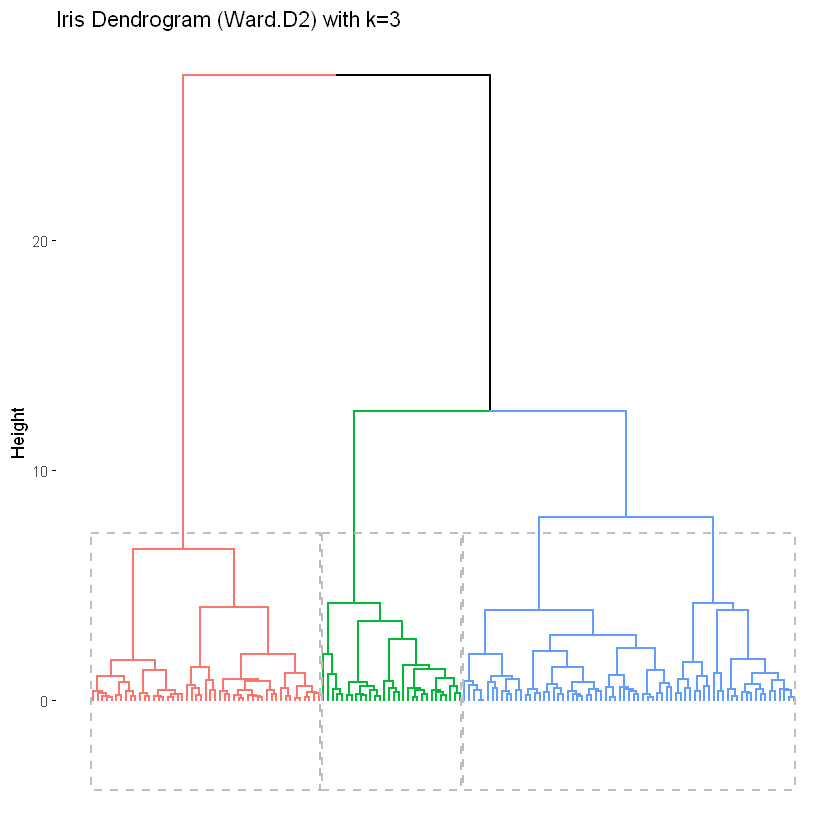

In [33]:
k <- 3
fviz_dend(hc, k = k, rect = TRUE, show_labels = FALSE,
          main = "Iris Dendrogram (Ward.D2) with k=3")

cl <- cutree(hc, k = k)
table(cl)

In [34]:
pca <- prcomp(X, center = FALSE,)
pc  <- as.data.frame(pca$x[, 1:2])
pc$cluster <- factor(cl)


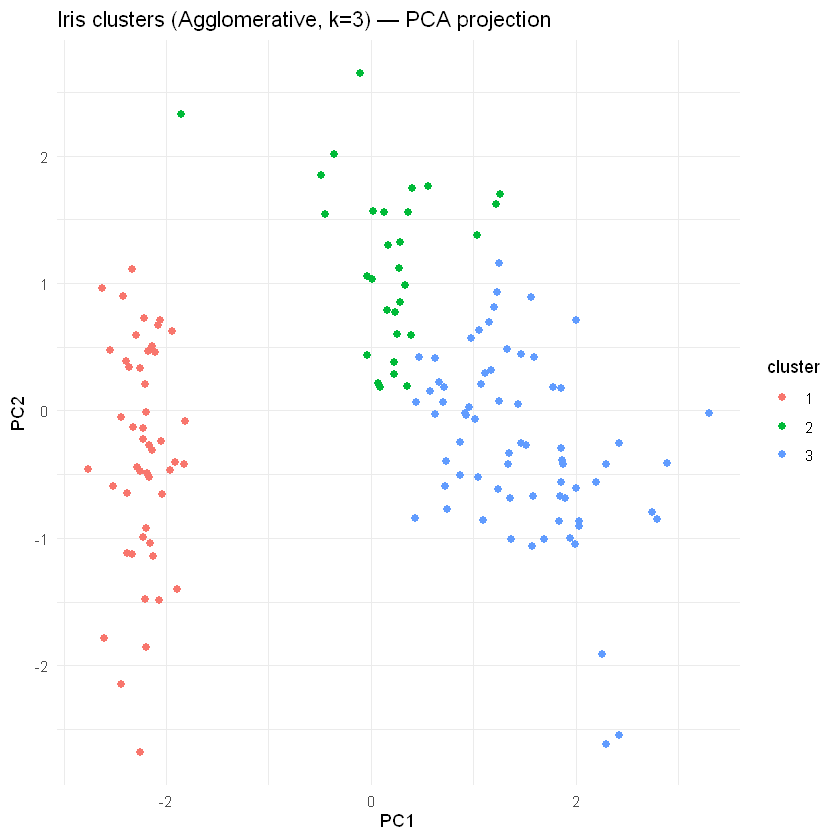

In [35]:
ggplot(pc, aes(PC1, PC2, color = cluster)) +
  geom_point(size = 2) +
  labs(title = "Iris clusters (Agglomerative, k=3) — PCA projection") +
  theme_minimal()
